# Agent-based model for News diffusion and misinformation

What I want to do is to create agents that share news, then from there find some interesting insights that could help fake news research

#### The first thing we need to do is to import news article and user classes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classes import NewsArticle,User, NewsAgency

1. User attributes:  
  a. unique_id : a non-intelligent number given to the user  
  b. news_spread_chance : a percentage of the user spreading news (can be compared to confidence and censorship)   
  c. preference : the position the user feels about the current subject being discussed  
  d. user_type: the user could be a regular user or a news agency  
  e. articles : a list of articles shared by the user  



2. News agency attributes:  
  a. unique_id : a non-intelligent number given to the user  
  b. news_spread_chance : a percentage of the user spreading news (can be compared to confidence and censorship)   
  c. preference : the position the user feels about the current subject being discussed  
  d. user_type: the user could be a regular user or a news agency  
  e. articles : a list of articles shared by the user  
  f. reliable : indicates how reliable this agency is
        
        
3. News article attributes:  
  a. news_article_id : a non-intelligenct number given to the article  
  b. source_id : the id of the source  
  c. source_preference : the preference of the source  
  d. sentiment : a number from [1,5] or [-5,-1]  
  e. num_shares :  the number of people sharing the article  
  f. fake : 1 if the news is fake, otherwise real

#### Lets try to create a simple news article

In [2]:
x = NewsArticle(1,100,0.8,4,21,1)

In [3]:
x

News Article ID: 1
Source ID: 100
Source Preference: 0.8
Sentiment: 4
Number of shares: 21
Fake (True:1, False:0): 1

In [4]:
u = User(1000,0.5,0.2,'regular',[x])

In [5]:
u

User ID: 1000
News Spread Chance: 0.5
Preference: 0.2
Type: regular

In [6]:
n = NewsAgency(8000,0.9,-0.8,'news_agency',[x],1)

In [7]:
n

User ID: 8000
News Spread Chance: 0.9
Preference: -0.8
Type: news_agency
Reliable:1

#### Now we need to try to create a few users

news_agencies_ratio is a network attribute to add that takes the amount of news agencies in the network  
number_of_users is a network attribute that creates a graph of a certain number of nodes equal to the number of users

In [8]:
from random import random, uniform, choice
from SimHelper import generate_weighted_percentage, generate_bias
from scipy.stats import beta

In [9]:
users = []
regular_users = []
news_users = []

news_agencies_ratio = 0.2
number_of_users = 100

number_of_regualr_users = int(number_of_users*(1-news_agencies_ratio))
number_of_news_users = number_of_users - number_of_regualr_users

print('Number of users:',number_of_users,'\nNumber of regular users:',number_of_regualr_users,'\nNumber of news agencies:',number_of_news_users)

Number of users: 100 
Number of regular users: 80 
Number of news agencies: 20


In [10]:
#create the beta distribution for news agencies to be a beta distribution with alpha=beta=0.3
# data_beta = beta.rvs(a=0.3,b=0.3,size=1000)
data_beta = beta.rvs(a=2,b=5,size=1000)
beta_dist = np.interp(data_beta, (data_beta.min(), data_beta.max()), (-1, 1))
news_reliability = 0.3


for i in range(number_of_news_users):
    unique_id = i
    user_type = 'news_agency' 
    news_spread_chance = 1
    articles = []
    reliable = (generate_weighted_percentage(news_reliability))
    if reliable == 0:
        preference = round(choice([x for x in beta_dist if abs(x)>0.4]),2)
    else:
        preference = round(choice([x for x in beta_dist if abs(x)<0.8]),2)
    news_users.append(NewsAgency(unique_id,news_spread_chance,preference,user_type,articles,reliable))
    users.append(NewsAgency(unique_id,news_spread_chance,preference,user_type,articles,reliable))

for i in range(len(news_users),number_of_regualr_users+len(news_users)):
    unique_id = i
    user_type = 'regular'
    news_spread_chance = round(random(),2)
    preference = generate_bias(mu = 0, sigma = 3)    
    articles = []
    regular_users.append(User(unique_id,news_spread_chance,preference,user_type,articles))
    users.append(User(unique_id,news_spread_chance,preference,user_type,articles))

In [11]:
users[21]

User ID: 21
News Spread Chance: 0.77
Preference: 0.45
Type: regular

In [12]:
regular_user_count = 0
for user in users:
    if user.user_type == 'regular':
        regular_user_count += 1
print('Ratio of regular users=',regular_user_count/number_of_users,' ,and new agencies =', (number_of_users-regular_user_count)/number_of_users)

Ratio of regular users= 0.8  ,and new agencies = 0.2


### Lets try to create a network of the users

In [13]:
import networkx as nx

In [14]:
G = nx.Graph()
G.add_nodes_from(users)

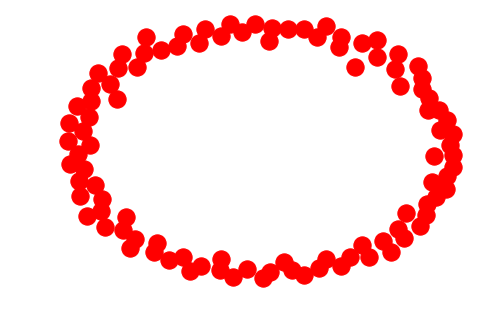

In [15]:
%matplotlib inline
nx.draw(G)

In [16]:
# G = nx.scale_free_graph(100)
# G = G.to_undirected()

In [17]:
color_map = []
for node in list(G.nodes()):
    if node.preference < -0.5:
        color_map.append('red')
    elif node.preference > 0.5:
        color_map.append('blue')
    else:
        color_map.append('grey')

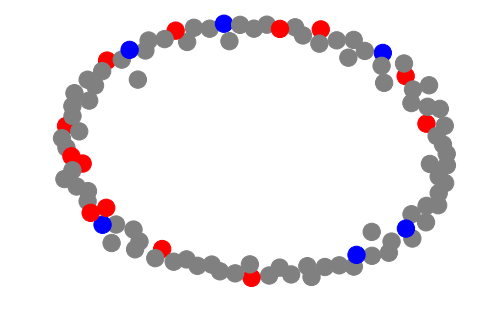

In [18]:
%matplotlib inline
nx.draw(G, node_color=color_map)

#### Add edges by Power law distribution

In [19]:
edge_list = []
for i in range(number_of_users):
    number_of_edges = int((np.random.pareto(a=5)+.1)*30)
    if number_of_edges > number_of_users:
        number_of_edges /= 2
    edge_list.append(int(number_of_edges))

In [20]:
edge_list

[8,
 8,
 10,
 14,
 8,
 8,
 5,
 4,
 4,
 7,
 16,
 4,
 5,
 7,
 18,
 4,
 3,
 7,
 33,
 7,
 4,
 68,
 12,
 7,
 15,
 10,
 3,
 7,
 27,
 5,
 7,
 18,
 8,
 17,
 19,
 6,
 8,
 11,
 15,
 9,
 4,
 9,
 5,
 10,
 16,
 3,
 24,
 4,
 6,
 4,
 6,
 3,
 18,
 4,
 22,
 6,
 7,
 3,
 63,
 3,
 11,
 7,
 3,
 30,
 5,
 3,
 7,
 6,
 28,
 7,
 26,
 3,
 12,
 4,
 3,
 6,
 9,
 5,
 7,
 29,
 13,
 3,
 17,
 6,
 4,
 20,
 14,
 23,
 15,
 3,
 7,
 6,
 3,
 11,
 4,
 19,
 30,
 3,
 7,
 7]

(array([40., 24.,  8.,  6.,  9.,  2.,  2.,  3.,  3.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 3.  ,  6.25,  9.5 , 12.75, 16.  , 19.25, 22.5 , 25.75, 29.  ,
        32.25, 35.5 , 38.75, 42.  , 45.25, 48.5 , 51.75, 55.  , 58.25,
        61.5 , 64.75, 68.  ]),
 <a list of 20 Patch objects>)

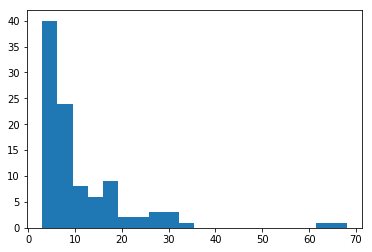

In [21]:
plt.hist(edge_list,bins=20)

In [22]:
from random import sample
for i in range(number_of_users):
    neighbors = sample(users,edge_list[i])
#     print(neighbors)
    for neighbor in neighbors:
      G.add_edge(users[i],neighbor)  

C:\Users\abdal\AppData\Local\conda\conda\envs\simulations\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


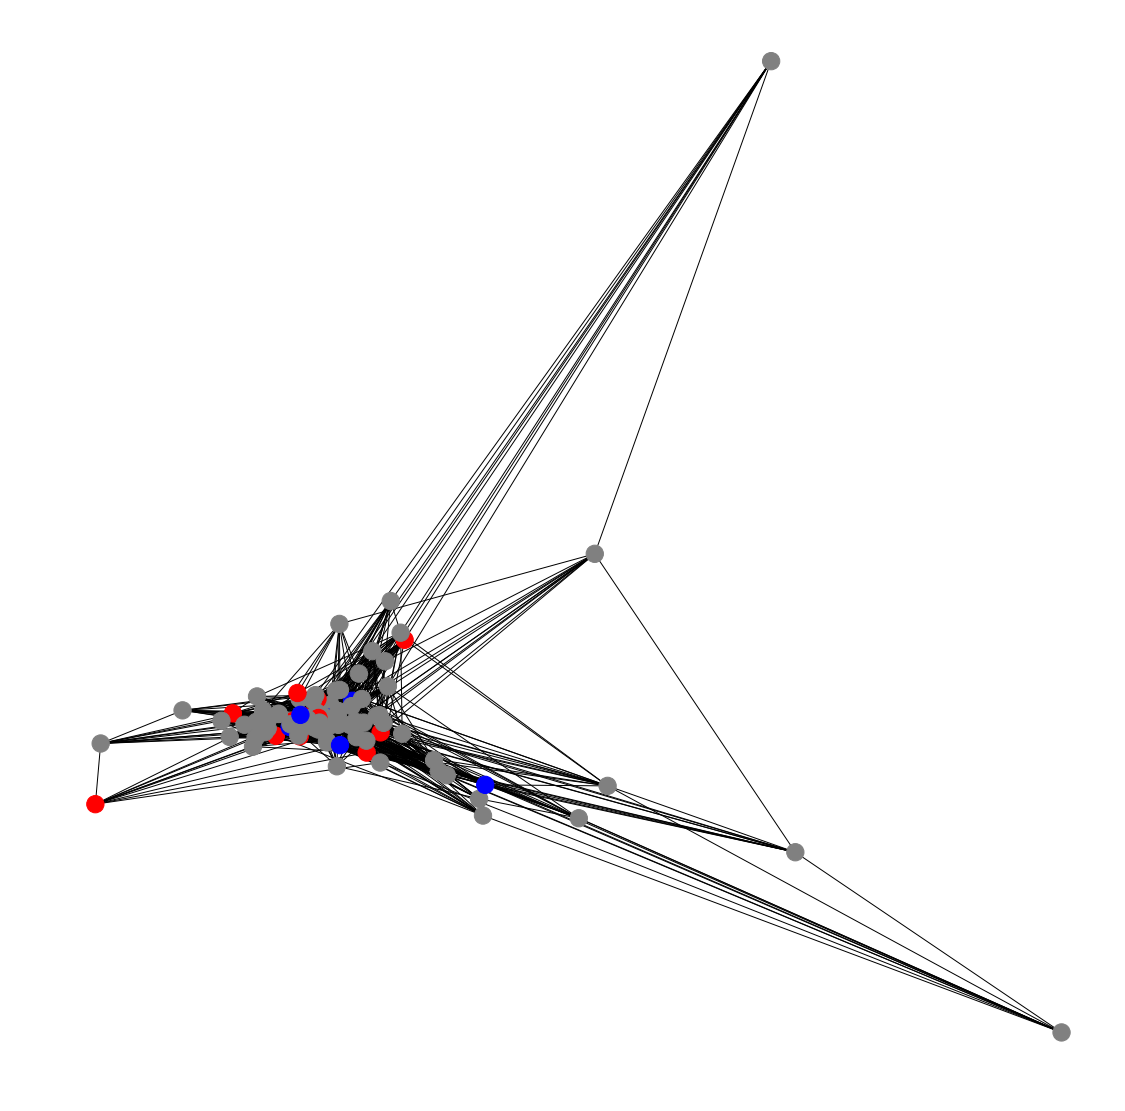

In [23]:
## %matplotlib inline
# nx.draw_spectral(G, node_color=color_map)
pos = nx.spectral_layout(G)
plt.figure(1,figsize=(15,15))
nx.draw(G,pos, node_color=color_map)
plt.show()

In [24]:
import collections

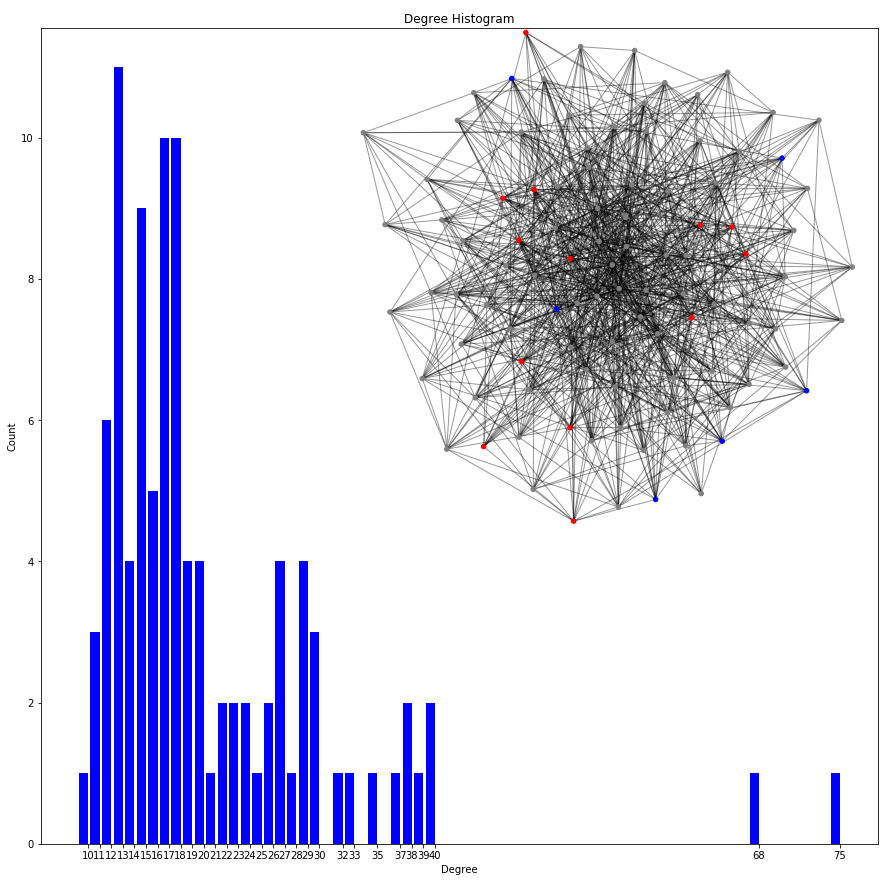

In [25]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(15,15))
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=20, node_color=color_map)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.show()

#### Lets spread some news and see how users change their preferences

ticks is another network variable that is used to measure time, it does not mean a specfic time stamp we know at the moment  
fake_news_prob is another network variable that measures how much the percentage of fake news will be generated throughout the network  
For every time step t:  
- Make news events from the news agencies  
- Ask every agent to spread their articles across the network  
- Change the 'regular' user preference and compute overall network preference

In [26]:
def create_news_event (user,sentiment,fake):
    """
    Make a news event
    a. news_article_id
    b. source_id : the id of the source
    c. source_preference : the preference of the source
    d. sentiment : a number from [1,5] or [-5,-1]
    e. num_shares : the number of people sharing the article
    f. fake : 1 if the news is fake, otherwise real
    """
    # assign an id in the format of user id + 1000
    if not user.articles:
        news_id = int(str(user.unique_id)+str(1000))
    else:
        news_id = user.articles[-1].news_article_id +1
    
    # get source_id and source_preference
    source_id = user.unique_id
    source_preference = user.preference
    sentiment = sentiment
    num_shares = 1
    fake = fake
    
    article = NewsArticle(news_id,source_id,source_preference,sentiment,num_shares,fake)
    
    user.articles.append(article)

In [27]:
def get_neighbor_preferences(user):
    """
    Get the average preference of a user's neighbors
    """
    temp = []
    for n in list(G[users[user.unique_id]]):
#         print(abs(user.preference - n.preference))
        temp.append(n.preference)
    return round(np.mean(temp),2)

In [28]:
def spread_news(user):
    """
    Add the latest news article from a user to their neighbors based on the user preference and sentiment
    """
    community_opinion = get_neighbor_preferences(user)
    if user.articles:
        for neighbor in list(G[users[user.unique_id]]):
            # check 1: the article is not in the neighbor AND the neighbor is not a news source
            if (user.articles[-1] not in neighbor.articles) and (neighbor.user_type == 'regular'):
                similarity = 1-((abs(neighbor.preference - user.preference))/2)
                if generate_weighted_percentage(similarity):
                    # check 2: both users have similar preferences
                    community_similarity = similarity = 1-((abs(community_opinion - user.preference))/2)
                    if generate_weighted_percentage(community_similarity):
                        # check 3: user and community are similar
                        if generate_weighted_percentage(abs(user.articles[-1].sentiment/5)):
                            # check 4: the sentiment is high enough for the user to care to share
#                             print('user '+str(user.unique_id)+' shared '+str(user.articles[-1].news_article_id)+' with '+str(neighbor.unique_id))
                            neighbor.articles.append(user.articles[-1])
                            #update the neighbor's preference
                            if neighbor.preference > user.preference:
#                                 print('neighbor --',neighbor.unique_id,neighbor.preference)
                                neighbor.preference -= 0.002 
#                                 print(neighbor.unique_id,neighbor.preference)
                            elif neighbor.preference < user.preference:
#                                 print('neighbor ++',neighbor.unique_id,neighbor.preference)
                                neighbor.preference += 0.002
#                                 print(neighbor.unique_id,neighbor.preference)
                            neighbor.preference = round(neighbor.preference,4)

In [29]:
def get_regular_user_preferences():
    """
    return the mean and std dev of the user preference
    """
#     preferences = []
#     for node in regular_users:
#         preferences.append(node.preference)

    preferences = []
    for node in users:
        preferences.append(node.preference)

    print('mean = ',round(np.mean(preferences),2),'standard dev = ',round(np.std(preferences),2))
    plt.hist(preferences)

mean =  -0.1 standard dev =  0.38


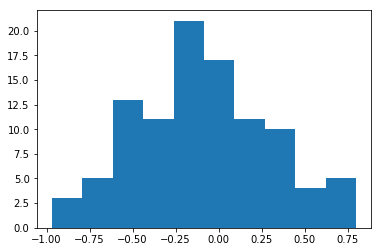

In [30]:
get_regular_user_preferences()

(array([ 3.,  5., 13., 11., 21., 17., 11., 10.,  4.,  5.]),
 array([-0.97 , -0.793, -0.616, -0.439, -0.262, -0.085,  0.092,  0.269,
         0.446,  0.623,  0.8  ]),
 <a list of 10 Patch objects>)

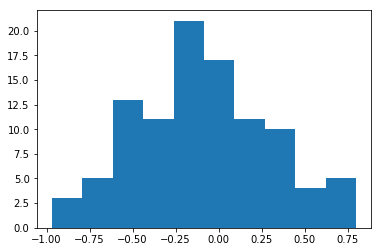

In [31]:
preferences = []
for node in users:
    preferences.append(node.preference)

plt.hist(preferences)

(array([1., 4., 2., 7., 3., 0., 0., 1., 1., 1.]),
 array([-0.97, -0.81, -0.65, -0.49, -0.33, -0.17, -0.01,  0.15,  0.31,
         0.47,  0.63]),
 <a list of 10 Patch objects>)

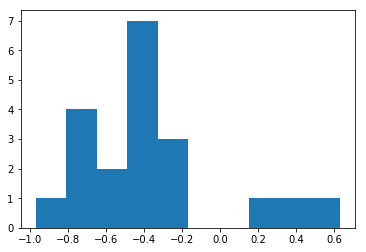

In [32]:
preferences = []
for node in news_users:
    preferences.append(node.preference)

plt.hist(preferences)

In [34]:
from SimHelper import generate_weighted_sentiment
from random import sample, randint
from tqdm import tqdm_notebook as tqdm

tick number:  0
mean =  -0.1 standard dev =  0.38
tick number:  140
mean =  -0.18 standard dev =  0.25
tick number:  280
mean =  -0.21 standard dev =  0.22
tick number:  420
mean =  -0.22 standard dev =  0.22
tick number:  560
mean =  -0.23 standard dev =  0.22
tick number:  700
mean =  -0.23 standard dev =  0.22
tick number:  840
mean =  -0.23 standard dev =  0.22
tick number:  980
mean =  -0.23 standard dev =  0.22
tick number:  1120
mean =  -0.23 standard dev =  0.22
tick number:  1260
mean =  -0.23 standard dev =  0.22
tick number:  1400
mean =  -0.24 standard dev =  0.22
tick number:  1540
mean =  -0.23 standard dev =  0.22
tick number:  1680
mean =  -0.24 standard dev =  0.22
tick number:  1820
mean =  -0.24 standard dev =  0.22
tick number:  1960
mean =  -0.23 standard dev =  0.22
tick number:  2100
mean =  -0.24 standard dev =  0.22
tick number:  2240
mean =  -0.23 standard dev =  0.22
tick number:  2380
mean =  -0.24 standard dev =  0.22
tick number:  2520
mean =  -0.24 standa

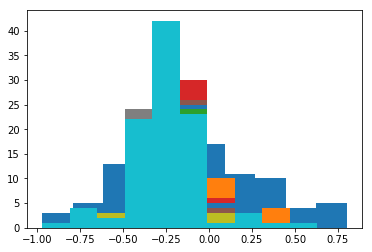

In [35]:
ticks = 7000
fake_news_prob = 0.7
for t in range(ticks):
    if t % 140 == 0:
        print('tick number: ',t)
#         get_regular_user_preferences()
        preferences = []
        for node in users:
            preferences.append(node.preference)

        print('mean = ',round(np.mean(preferences),2),'standard dev = ',round(np.std(preferences),2))
        plt.hist(preferences)
        
    sampled_news_agencies = sample(news_users,randint(1,len(news_users)-1))
    for n in sampled_news_agencies:
        if random() < fake_news_prob and n.reliable == 0:
            #generate fake news
            sentiment = generate_weighted_sentiment(a=4)
            fake = 1
        else:
            #generate real news
            sentiment = generate_weighted_sentiment()
            fake = 0
        create_news_event(n,sentiment,fake)
        spread_news(n)
    sampled_regular_users = sample(regular_users,randint(1,len(regular_users)-1))
    for u in sampled_regular_users:
        spread_news(u)

(array([297078., 196129.,  85707.,  39629.,    445.,      0.,  38708.,
         85190., 202379., 293879.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <a list of 10 Patch objects>)

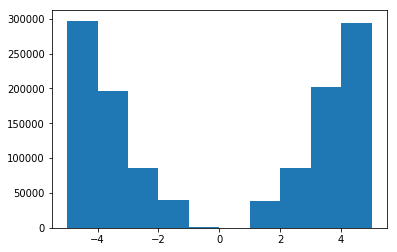

In [35]:
#histogram of all articles being shared
articles = []
for node in list(G.nodes):
    for article in node.articles:
        articles.append(article.sentiment) 

plt.hist(articles)

(array([11011.,  9940.,  6898.,  6881.,   123.,     0.,  7039.,  6992.,
        10190., 11138.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <a list of 10 Patch objects>)

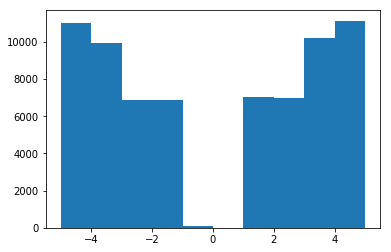

In [36]:
#histogram of UNIQUE articles being shared
articles_unique = []
articles_set = set()
for node in list(G.nodes):
    for article in node.articles:
        if article not in articles_set:
            articles_set.add(article)
            articles_unique.append(article.sentiment) 

plt.hist(articles_unique)

In [37]:
len(articles_unique)

70212

In [38]:
len(articles)

1239144

(array([ 7.,  2.,  5., 11., 50., 16.,  3.,  1.,  1.,  4.]),
 array([-0.99 , -0.791, -0.592, -0.393, -0.194,  0.005,  0.204,  0.403,
         0.602,  0.801,  1.   ]),
 <a list of 10 Patch objects>)

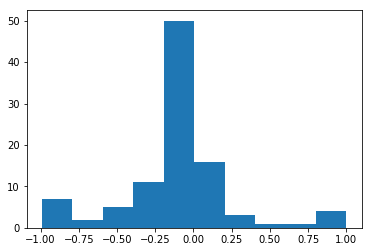

In [39]:
preferences = []
for node in users:
    preferences.append(node.preference)

plt.hist(preferences)